In [3]:
# Atividade Prática – EDA e Viz do Campeonato Brasileiro

## Análise de Jogos de Futebol 

#### Objetivo: Analisar os dados do Campeonato Brasileiro e outros (8.453 jogos, 2003-2024) para extrair insights que orientem decisões sobre clubes e jogos

## 1. Estatísticas Descritivas e Visualizações Básicas

- 1. Distribuição de gols:
- 2. Mando de campo
- 3. Público
- 4. Respostas

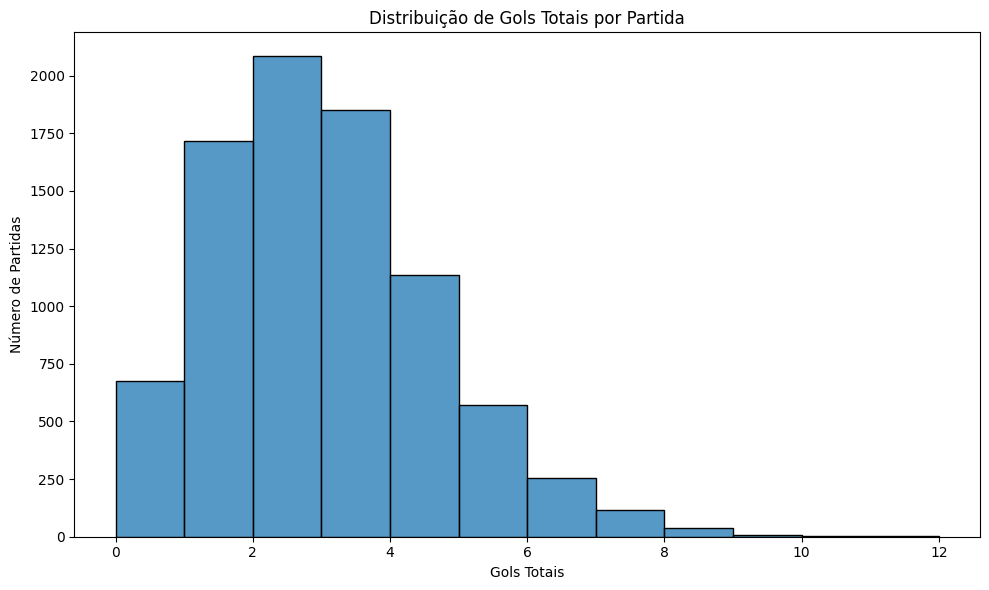

In [1]:
# 1.1 Carregamento do arquivo CSV
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

df = pd.read_csv('futebol.csv')
# TODO: Crie coluna gols_total = gols_mandante + gols_visitante

df['gols_total'] = df['gols_mandante'] + df['gols_visitante']

# TODO: Histograma da distribuição de gols totais

plt.figure(figsize=(10, 6))
sns.histplot(df['gols_total'], bins=range(0, int(df['gols_total'].max()) + 2), kde=False)
plt.title('Distribuição de Gols Totais por Partida')
plt.xlabel('Gols Totais')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.show()

# TODO: Calcule: média, mediana, moda, desvio padrão, IQR
media_gols = df['gols_total'].mean()
mediana_gols = df['gols_total'].median()
moda_gols = df['gols_total'].mode()[0]
desvio_padrao_gols = df['gols_total'].std()
iqr_gols = stats.iqr(df['gols_total'])

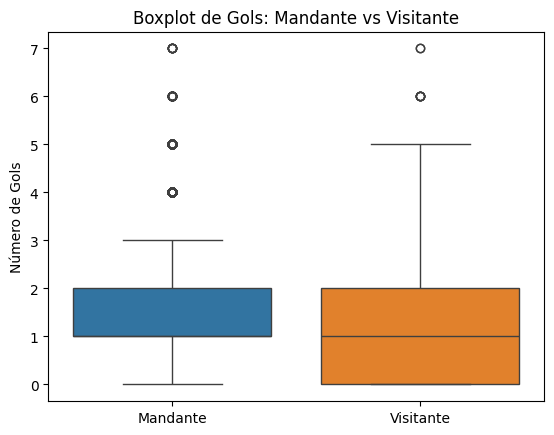

Comparação - Gols Mandante vs Visitante
Média Mandante: 1.53
Mediana Mandante: 1.0
Moda Mandante: 1.0

Média Visitante: 1.02
Mediana Visitante: 1.0
Moda Visitante: 0.0



In [2]:
# 1.2 Mando de campo
# TODO: Boxplots: gols mandante vs visitante
sns.boxplot(data=df[['gols_mandante', 'gols_visitante']])
plt.title('Boxplot de Gols: Mandante vs Visitante') 
plt.ylabel('Número de Gols')
plt.xticks([0, 1], ['Mandante', 'Visitante'])
plt.show()
# TODO: Identifique e interprete outliers

# Mandante: valores acima de 3 gols são considerados outliers, ou seja,
# partidas com 4, 5, 6 e até 7 gols do mandante são eventos raros em relação à maioria dos jogos
# Visitante: valores acima de 5 gols são considerados outliers,
# dá pra interpretar que é mais comum os visitantes marcarem mais de 3 gols em comparação com os mandantes,
# e que goleadas com mais de 5 gols são eventos raros em relação à maioria dos jogos

# TODO: Compare medidas de tendência central
media_mandante = df['gols_mandante'].mean()
mediana_mandante = df['gols_mandante'].median()
moda_mandante = df['gols_mandante'].mode()[0]
media_visitante = df['gols_visitante'].mean()
mediana_visitante = df['gols_visitante'].median()
moda_visitante = df['gols_visitante'].mode()[0]

print("Comparação - Gols Mandante vs Visitante")

print(f"Média Mandante: {media_mandante:.2f}")
print(f"Mediana Mandante: {mediana_mandante}")
print(f"Moda Mandante: {moda_mandante}\n")

print(f"Média Visitante: {media_visitante:.2f}")
print(f"Mediana Visitante: {mediana_visitante}")
print(f"Moda Visitante: {moda_visitante}\n")



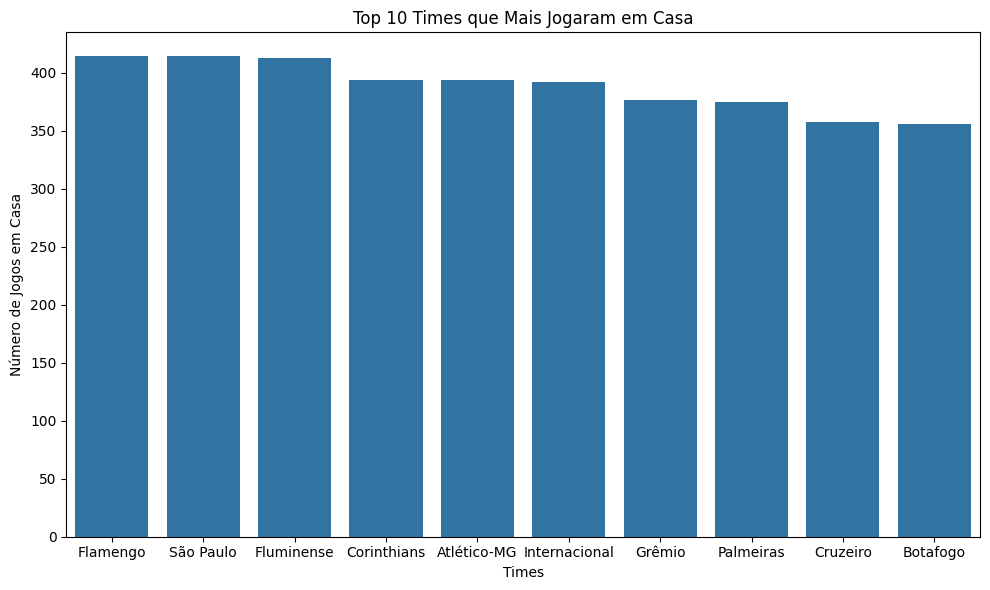

count     6742.000000
mean     16189.951943
std      14074.412391
min          0.000000
25%       5898.250000
50%      12685.500000
75%      22963.250000
max      82044.000000
Name: publico, dtype: float64


C:\Users\Artur\AppData\Local\Temp\ipykernel_3600\3892291696.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gols_por_faixa = df.groupby('faixa_publico')['gols_total'].mean().reset_index()


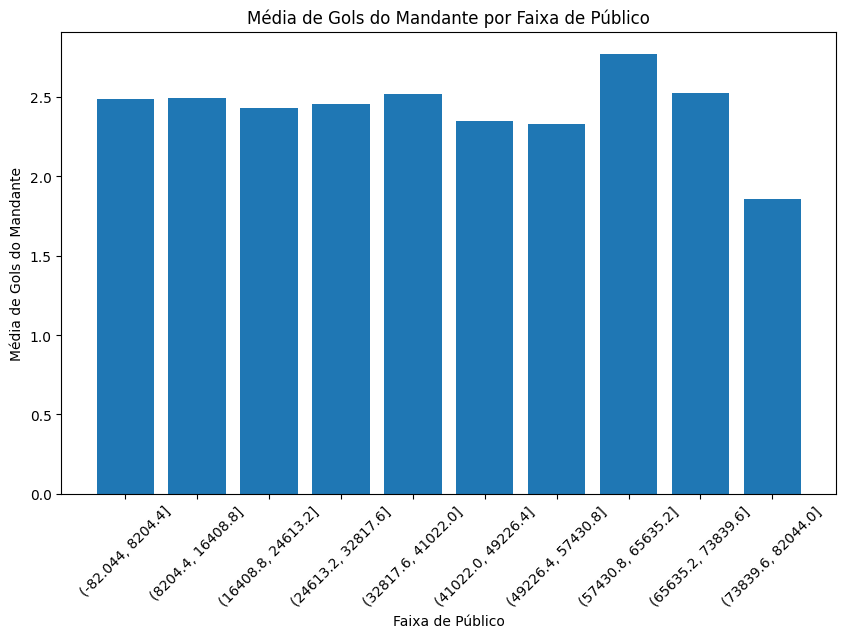

In [3]:
# 1.3 Público
# TODO: Gráfico de barras: 10 times que mais jogaram em casa
top_10_times = df['time_mandante'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_times.index, y=top_10_times.values)
plt.title('Top 10 Times que Mais Jogaram em Casa')
plt.xlabel('Times')
plt.ylabel('Número de Jogos em Casa')
plt.tight_layout()
plt.show()

# TODO: Estatísticas descritivas do público (dados não-nulos)
publico_stats = df['publico'].dropna().describe()
print(publico_stats)

# Criar faixas de público
df['faixa_publico'] = pd.cut(df['publico'], bins=10)
# Contar média de gols por faixa de público
media_gols_por_faixa = df.groupby('faixa_publico')['gols_total'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(media_gols_por_faixa['faixa_publico'].astype(str), media_gols_por_faixa['gols_total'])
plt.xticks(rotation=45)
plt.title('Média de Gols do Mandante por Faixa de Público')
plt.xlabel('Faixa de Público')
plt.ylabel('Média de Gols do Mandante')
plt.show()

# Respostas

• A distribuição de gols é simétrica ou assimétrica? O que isso indica?

R: Assimétrico com base na diferença entre a Média, Moda e Mediana

• Há vantagem numérica do mando de campo?

R:Sim, há em média um aumento de 50%

• Qual a relação entre público e gols?

R: A pressão de jogos maiores tais como Derby's faz com que a média de gols seja menor

## 1.2 Teste de Hipótese

### Contexto: Quantificar estatisticamente se a “vantagem do mando de campo” existe.
As hipóteses:

• H0: μmandante = μvisitante (sem diferença)

• H1: μmandante > μvisitante (mandantes marcam mais)

In [12]:
#Execute teste t:
# Use scipy.stats.ttest_ind()
# Nível de significância: α = 0,05
# Calcule e interprete valor-p
gols_mandante = df['gols_mandante'].dropna()
gols_visitante = df['gols_visitante'].dropna()
t_stat, p_valor = ttest_ind(gols_mandante, gols_visitante)
print("Estatística t:", t_stat)
print("Valor-p :", p_valor)
if t_stat > 0:
    p_valor_unicaudal = p_valor / 2
else:
    p_valor_unicaudal = 1 - (p_valor / 2)
print("Valor-p (unicaudal):", p_valor_unicaudal)

alpha = 0.05
if p_valor_unicaudal < alpha:
    print("Rejeita H0 = mandantes marcam mais gols")
else:
    print("Não rejeita H0 = não há evidência suficiente de vantagem do mando")

Estatística t: 29.189561129282634
Valor-p : 8.772428607979118e-183
Valor-p (unicaudal): 4.386214303989559e-183
Rejeita H0 = mandantes marcam mais gols


Diferença das médias: 0.5050875532418362 gols por jogo
Média mandante: 1.5281590156176053
Média visitante: 1.023071462375769


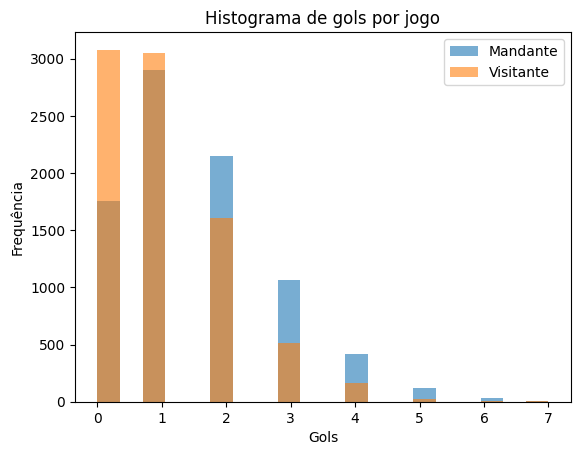

In [10]:
#Analise resultados: 
# Tamanho do efeito (diferença das médias)
diferenca_media = gols_mandante.mean() - gols_visitante.mean()
print("Diferença das médias:", diferenca_media, "gols por jogo")

# Significância estatística vs relevância prática
print("Média mandante:", gols_mandante.mean())
print("Média visitante:", gols_visitante.mean())
# os mandantes marcam, em média, meio gol a mais por partida, sendo assim, tem vantagem de jogar em casa,
# mas não é exagerada

# Visualização ilustrando o resultado


plt.hist(gols_mandante, bins=20, alpha=0.6, label="Mandante")
plt.hist(gols_visitante, bins=20, alpha=0.6, label="Visitante")
plt.title("Histograma de gols por jogo")
plt.xlabel("Gols")
plt.ylabel("Frequência")
plt.legend()
plt.show()

O valor-p permite rejeitar H0?
Sim

Qual a diferença prática em gols?
A diferença média entre mandantes e visitantes é aproximadamente 0,505 gols por jogo. Isso significa que um time jogando em casa marca, em média, meio gol a mais por partida do que o time visitante.

O resultado é significativo E relevante?
É significativo porque o valor-p é extremamente baixo, e uma diferença de 0,5 gols por jogo é relevante no futebol, onde partidas são decididas por 1 gol.


## 1.3 Investigação Livre + Pitch
